In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from FKMC.general import shapes

%matplotlib inline
np.seterr(all='warn')
mpl.rcParams['figure.dpi'] = 70

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

from functools import wraps
@wraps(plt.subplots)
def my_subplots(*args, **kwargs):
    if not 'figsize' in kwargs and len(args) > 1:
        width = 5
        maxwidth = 15
        rows, cols, *_ = args
        w = min(maxwidth, width * cols)
        kwargs['figsize'] = (w, w / cols / 1.6 * rows)
    
    gridspec_kw = dict()
    if kwargs.get('sharex') == 'col':
        gridspec_kw['hspace'] = 0.1
    if kwargs.get('sharey') == 'row':
        gridspec_kw['wspace'] = 0.1
    if 'gridspec_kw' in kwargs:
        gridspec_kw.update(kwargs['gridspec_kw'])
    kwargs['gridspec_kw'] = gridspec_kw
    
    return plt.subplots(*args, **kwargs)

In [33]:
from import_funcs import get_data_structured
from pathlib import Path

obs = get_data_structured(Path('/data/users/tch14/slurm_runs/102989'),
                requested_observables = ['Ff', 'Fc', 'Mf_moments', 'time', 'IPRs', 'eigenvals', 'state','accept_rates', 'classical_accept_rates', 'proposal_rates'],
               structure_names = ('repeats','Ts'),
               )

looking in /data/users/tch14/slurm_runs/102989
job ids range from 0 to 299
structure_names = ('repeats', 'Ts')
structure_dims = (array(100), 3)
Expected number of jobs 300
Missing jobs: {96, 18}

Logger keys:  ['total_jobs', 'Ts', 'Ns', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'logs', 'desc'] 

MCMC_params:  Munch({'state': None, 'N_steps': 5000, 'N_burn_in': 1000, 'thin': 100, 'logger': <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7f18ab8aee80>, 'proposal': <function p_multi_site_uniform_reflect at 0x7f18adaf8378>, 'accept_function': <function perturbation_accept at 0x7f18adaf86a8>, 'warnings': True}) 

MCMC Steps: 5000 with thinning = 100 for 50 recorded steps
Slicing this with MCMC_slice = slice(None, None, 1)

[(0, 'repeats', array(100)), (1, 'Ts', 3)]
available observables = ['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_rates', 'classical_accept_rates', 'eigenval_bins', 'eigenvals', 'last_state', 'powers', 

In [46]:
obs.Mf_moments.shape, obs.hints.Mf_moments
obs.state[0].shape, obs.hints.state

((100, 3, 50, 256), ('Ns', 'repeats', 'Ts', 'MCstep', 'N'))

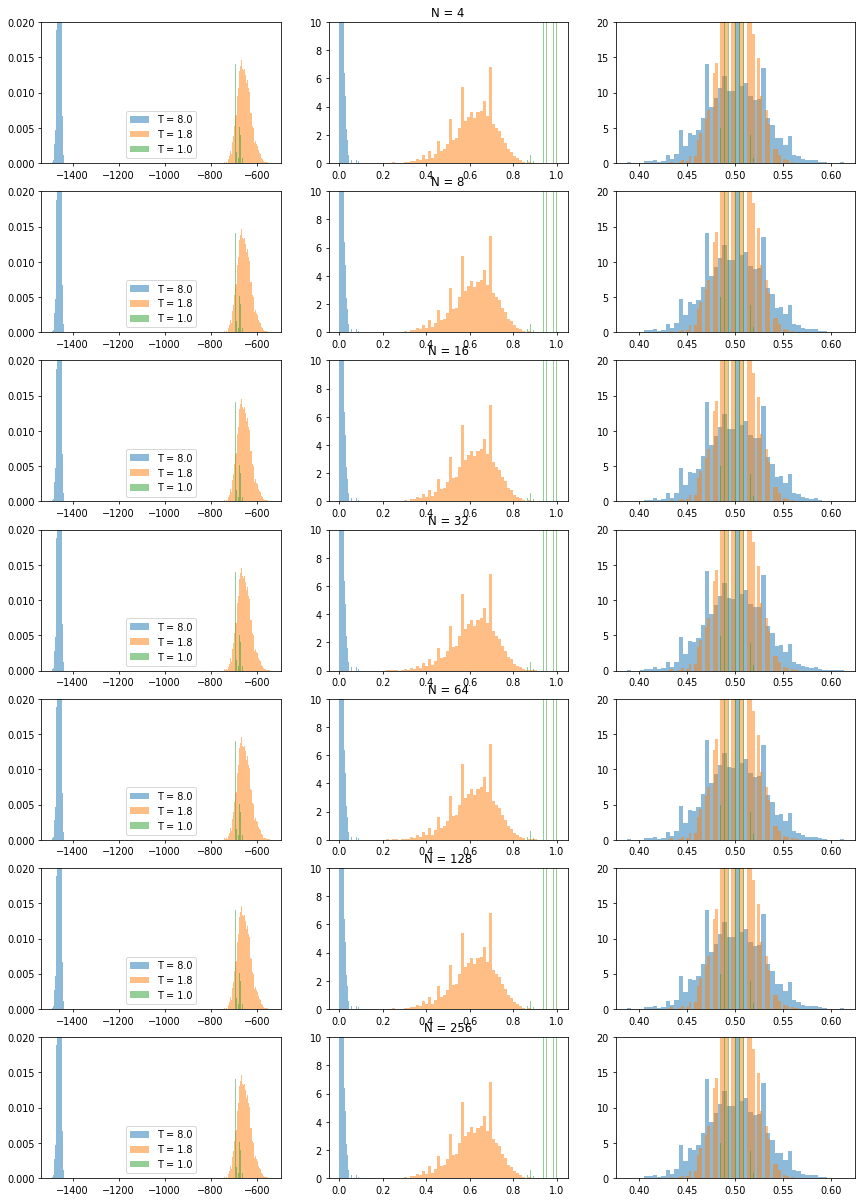

In [64]:
from itertools import count

j = np.all(np.isfinite(obs.Fc[-1]), axis = (-2,-1)) #cut out the jobs that didn't run

f, axeses = my_subplots(len(obs.Ns),3)

for k, N, axes in zip(count(), obs.Ns, axeses):
    for i, T in zip(count(), obs.Ts):
        axes[0].set(title  = '', ylim = (0,0.02))

        hist_args = dict(bins = 50, alpha = 0.5, density = 1)

        axes[0].hist((obs.Fc+obs.Ff)[k, j, i].flatten(), label = f'T = {T}', **hist_args)
        axes[0].legend()

        axes[1].hist(obs.Mf_moments[k, j, i, 2, :].flatten(), label = 'T = {T}', **hist_args) 
        axes[1].set(title  = f'N = {N}', ylim = (0,10))

        axes[2].hist(obs.state[k][j, i, :, :].mean(axis=-1).flatten(), label = 'T = {T}', **hist_args) 
        axes[2].set(title  = '', ylim = (0,20))